# Graphycal Exploratory Data Analysis


<font color=grey>
You can observe a lot by watching</font>– Yogi Berra

The same is true with data, if you can properly display your data, you can already to draw conclusions from it I am going even further, exploring your data is a crucial step in your analysis.

The process of organizing, plotting, and summarizing a data set is known as **exploratory data analysis**, or EDA, and was developed by one of the greatest statistitians of all time, John Turkey.


<font color=grey>
Exploratory data analysis can never be the whole story, but nothing else can serve as the foundation stone.</font>– John W. Tukey

<font color="orange">
# Why is EDA so important?
</font>
...

# Objectives of EDA
***
Exploratory Data Analysis (EDA) is an approach/philosophy for data analysis that employs a variety of techniques (mostly graphical) to maximize

1. insight into a data set;
2. uncover underlying structure;
3. extract important variables;
4. detect outliers and anomalies;
5. test underlying assumptions;
6. develop parsimonious models; and
7. determine optimal factor settings.


# Let's consider an example
***


### Elections results from 2008 
at the county lebel in each of the three major swing states of Pennsylvania, Ohia, and Florida

<img src="img/2008_elec_table.png",width=600>

This is how looks like when I am using ```pandas``` to look into the table (in the next sessions you will learn a lot more about this package)

In [1]:
import pandas as pd
pd_data = pd.read_csv("data/2008_swing_states.csv")

# loading data into NumPy Arrays
np_state  = pd_data['state'].values
np_county = pd_data['county'].values

pd_data.head(10)

,state,county,total_votes,dem_votes,rep_votes,dem_share
0,PA,Erie County,127691,75775,50351,60.08
1,PA,Bradford County,25787,10306,15057,40.64
2,PA,Tioga County,17984,6390,11326,36.07
3,PA,McKean County,15947,6465,9224,41.21
4,PA,Potter County,7507,2300,5109,31.04
5,PA,Wayne County,22835,9892,12702,43.78
6,PA,Susquehanna County,19286,8381,10633,44.08
7,PA,Warren County,18517,8537,9685,46.85
8,OH,Ashtabula County,44874,25027,18949,56.94
9,OH,Lake County,121335,60155,59142,50.46


We could stare these numbers, but I think you will agree that it pretty hopeless to gain any sort of understanding from doing this. 

Alternatively, we could charge in headlong and start defining and computing parameters and their confidence intervals, and do hypothesis tests. You will learn how to do all of these things in this session and its sequel. *But a good field commander does not just charge into battle without first getting a feel for the terrain and sizing up the opposing army.* So, like the field commander, we should explore the data first. 

In this part, we will discuss **graphyscal exploratory data analysis**. This involves taking data from tabular form, like we have here in ```np_data```, and representing it graphycally.
You are presenting the same information, but it is in a more human-interpretable form.

For example, we take the democratic share of the vote in the counties of all of the three swing states (```dem_share```) and **plot them as a histogram**.

<img src="img/perObamavots.png",width=400>

### By just watching ...
- The height of each bar is the number of counties that had the given level of support for Obama. For example, the tallest bar is the number of counties that had between 40% and 50% of its votes cast for Obama.
- Because there is more area in the histogram to the left of 50%, we can see that more counties voted for Obama's opponent, John McCain, than voted for Obama.

<font color=red>
Just by making one plot, we could already draw a conclusion about the data, which would have been extraordinarily tedious by hand counting the data from the table.
    </dont>


# 1. Histogram plot

The percent of vote for Obama can be plotted as a histogram using the ```matplotlib.pyplot``` module's hist function.

After creating the histogram, we label the axes. **Always label your axes, for histograms or any other king of plot**. Otherwise no one can know what it is you are plotting.

#### Read data from a CSV file:

In [2]:
# Illustration
# loading data
import numpy as np
import matplotlib.pyplot as plt

# read the data from a CSV file
np_data = np.genfromtxt( "data/2008_swing_states.csv", delimiter=",", usecols=(2,3,4,5), skip_header=1)

print "\n\t * data type of np_data", type(np_data)
print "\t * first row of np_data", np_data[0]


	 * data type of np_data <type 'numpy.ndarray'>
	 * first row of np_data [  1.27691000e+05   7.57750000e+04   5.03510000e+04   6.00800000e+01]


#### Plot the distribution of the feature  *dem_share* with ```plt.hist()```:

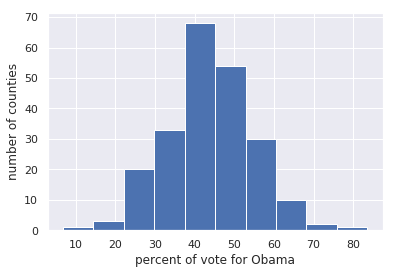

In [3]:
import seaborn as sns
sns.set()

# plot dem_share (the last column on the table)
_ = plt.hist( np_data[:,3], histtype='bar')
_ = plt.xlabel('percent of vote for Obama')
_ = plt.ylabel('number of counties')
plt.show()

Note that ```plt.hist``` returns three arrays that I am not interested in; I only want the plot. I therefore assign a dummy variable called *underscore* to them, which is commong practice in **Python**.

You probably notice that this plot looks slightly different from the plot just above: 
- one the one hand, I used the default settings of ```seaborn```, an excellent matplotlib-based statistical data visualization package (just call [```seaborn.set()```](https://seaborn.pydata.org/generated/seaborn.set.html))
- the number of bins, in this case is the one by default settings of ```plt.hist```(Nbins=10)



# 2. Bee swarm plot

The histogram of county-level election data was informative. We learn that more counties voted for MaCain than for Obama. Since our goal is to lear from data, this is great! 

However, a major drawback of using histograms is that **the same data set can look different depending on how the bins are chosen**. And choice of bins is in a way arbitrary.

<img src="img/Nbins_ex.png",width=500>

### Possible problems with histograms
1. This leads to **binning bias**; you might interpret your plot differently for two different choices of bin number.
2. An additional problem with histograms is that we are not plotting all of the data. We are sweeping the data into bins, and losing their actual values

To remedy these problems and explore more carefully the data, we can make a ***bee swarm plot**. Here an example of this kind of plots, for the vote totals in the three swing states:
<img src="img/beeswarm_plot.png",width=500>

Each point in the plot represents the share of the vote Obama got in a single county. The position along the y-axis is the quantitative information. The data are spread in x to make them visible, but their precise location along the x-axis is unimportant. Notably, we **no longer have any binning bias and all data are displayed**.


#### Plotting a bee swarm plot with ```sns.swarmplot()```:
To make the plot, you need to specify 
- which column gives the values for the y-axes, in this case the ```dem_share``` (i.e. column 3 from ```np_data```), and
- the values for the x-axes, in this case the state, ```np_state```


```python


In [1]: np_state = pd_data['state'].values    
In [2]: _ = sns.swarmplot( x=np_state, y=np_data[:,3] )    
In [3]: _ = plt.xlabel('state')    
In [4]: _ = plt.ylabel('percent of vote for Obama')
In [5]: plt.show()    
    
```

#### Let's do it:
- **np_state** is a 1D array of string with the state (PA, OH, FL) for each np_data row
- **np_data** is a 4D array of int and floats with the following attributes: total_votes, dem_votes, rep_votes, and dem_share (column index are 0,1,2, and 3, respectively)

In [4]:
# summary of the data
print "\n\t * np_state info: "
print "\t   Number of rows (observations): ", len(np_state)
print "\t   There are {0} different states in the sample: {1}".format(len(set(np_state)), set(np_state))
print "\n\t * np_data info: "
print "\t   Number of rows (observations): ", np_data.shape[0]
print "\t   Number of attribures/featires in np_data: ", np_data.shape[1]


	 * np_state info: 
	   Number of rows (observations):  222
	   There are 3 different states in the sample: set(['PA', 'FL', 'OH'])

	 * np_data info: 
	   Number of rows (observations):  222
	   Number of attribures/featires in np_data:  4


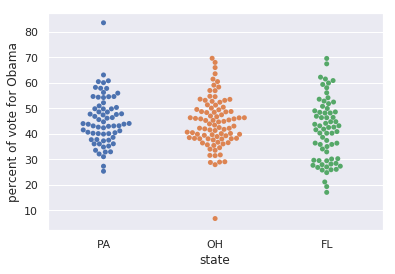

In [5]:
# plot the bee swarm plot for dem_share for all states
_ = sns.swarmplot( x=np_state, y=np_data[:,3] )
_ = plt.xlabel('state')
_ = plt.ylabel('percent of vote for Obama')
plt.show()

### By just watching ...
- From this plot, too, we can clearly see that Obama got less than 50% of the vote in the majority of counties in each of the three swing states.
- This time it is more detailed than a histogram, but without too much added visual complexity


# 3. ECDFs plots

<font color=red>There is a limit to the efficacy of the **bee swarm** plot</font>. For example, imagine we wanted to plot the county-level voting data for all states east of the Mississippi River and all states west.

<img src="img/beeswarm_limitation_ex.png",width=400>

In this case, the edges have overlapping data poitns, which was necessary in order to fit all points onto the plot. We are now obfuscating data. <font color=red>So, using a bee swarm plot here is not the best option.</font>

**As an alternative**, we can compute an **empirical cumulative distribution function, or ECDF**. Again, this is best explained by example. Here is a picture of an ECDF of the percentage of swing state votes that went to Obama. 

<img src="img/ECDFs_plot_ex.png",width=600>


#### An ECDF plot needs:
- A x-value of an ECDF is the quantity you are measuring, in this case the percent of vote that sent to Obama. 
- The y-value is the fraction of data points that have a value smaller than the corresponding x-value. The y-axis is evenly spaced data points with a maximum of one

#### By just watching ...
- For example, 20% of counties in swing states had 36% or less of its people vote for Obama.
- Similarly, 75% of counties in swing states had 50% or less of its people vote for Obama

#### Plot an ECDF with ```plt.plot()```:
- For the x-axis: sort the data you want to compute its empirical cumulative distribution function
- For the y-axis: create an array of size the length of your data, and normalize it to 1 as the maximum value of the ECDF (import when you want to compare it with other features/attributes)
- Use the plot function from the module ```plt```, and just plot it!


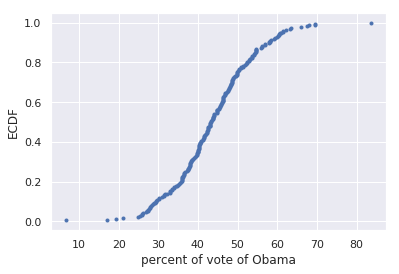

In [6]:
x = np.sort( np_data[:,3] )

xsize = len(x)

# evenly spaced data points with a maximum of one
y = np.arange( 1, xsize+1) / float(xsize)

# plot ECDF
_ = plt.plot(x, y, marker=".", linestyle="none")
_ = plt.xlabel('percent of vote of Obama')
_ = plt.ylabel('ECDF')

# to keep data off plot edges
# choosing a value of 0.05 gives a 5% buffer all around the plot
plt.margins(0.05)
plt.show()


## 3.1 Making an ECDF plot for several variables

Some times is very useful to plot several features at the same plot. Include more than one ECDF is very simple. 

Let's do the ECDF for the three states Pennsylbania, Ohia and Florida.

```python
In [1]: for state in ['PA','OH','FL']:
In [2]:     x = np.sort(np_data[np_state == state, 3])
In [3]:     y = np.arange( 1, len(x)+1) / float(len(x))
In [4]:     _ = plt.plot(x, y, marker=".", linestyle="none")

In [5]: _ = plt.xlabel('percent of vote of Obama')
In [6]: _ = plt.ylabel('ECDF')
In [7]: plt.legend(('PA', 'OH', 'FL'), loc='lower right')
In [8]: plt.margins(0.02)
In [9]: plt.show()

```

<img src="img/multiECDFs_ex.png",width=470>

### By watching ...
- We see that Ohio and Pennsylvania were similar, with Pennsylvania having slightly more Democratic counties. 
- Florida, on the other hand, had a greater fraction of heavily Republican counties

# Let's Practice!

<font color=red>
### Load data sets from CSV files: 
</font>
There are several python packages that can read data from a CSV file:

> - loadtxt from ```scipy```
> - genfromtxt function from ```numpy```
> - read_csv function from ```pandas```
> - ad function from ```csv```
> - ...

In this example, i will use the funciton ```np.genfromtxt()``` to load the data set ***data/iris.csv***

In [16]:
# load NumPy package as np
import numpy as np

# load pyplot as plt, and seaborn as sns
from matplotlib import pyplot as plt
import seaborn as sns

# set to the defoult settings asthetics of sns
sns.set()

iris = np.genfromtxt( "data/iris.csv", delimiter=",", skip_header=1)

# Select features for the versicolor type of iris
versicolor = iris[:,5]== 0
versicolor_petal_length = iris[versicolor,1]

#### Instructions:
1. Do the same for the setosa and virginica species:
    > 1. create a mask to select only those rows from the setosa specie (i.e. column 6 should be equal to 1)
    > 2. create an array for the petal length of the setosa specie and called it ***setosa_petal_length***
    > 3. reate a mask to select only those rows from the virginica specie (i.e. column 6 should be equal to 2)
    > 4. create an array for the petal length of the setosa specie and called it ***virginica_petal_length***

In [17]:
setosa = iris[:,5]== 1
setosa_petal_length = iris[setosa,1]

virginica = iris[:,5]== 2
virginica_petal_length = iris[virginica,1]

<font color=green>
# Exercise 1.  Computing the ECDF
</font>
In this exercise, you will write a function that takes as input a 1D array of data and then returns the x and y values of the ECDF. You will use this function over and over again throughout this section and its sequel. 

ECDFs are among the most important plots in statistical analysis. You can write your own function, foo(x,y) according to the following skeleton:

```python
    def foo(a,b):
        """State what function does here"""
        # Computation performed here
        return x, y
```

- The function foo() above takes two arguments a and b and returns two values x and y. 
- The function header def foo(a,b): contains the function signature foo(a,b), which consists of the function name, along with its parameters. 

#### Instructions
Define a function with the signature ecdf(data). Within the function definition:
> * Compute the number of data points, n, using the len() function.
> * The xx-values are the sorted data. Use the np.sort() function to perform the sorting.
> * The yy data of the ECDF go from 1/n to 1 in equally spaced increments. You can construct this using np.arange(). Remember, however, that the end value in np.arange() is not inclusive. Therefore, np.arange() will need to go from 1 to n+1. Be sure to divide this by n.
> * The function returns the values x and y.

In [18]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / float(n)

    return x, y


<font color=green>
# Exercise 2.  Plotting the ECDF
</font>
You will now use your ecdf() function to compute the ECDF for the petal lengths of Anderson's Iris versicolor flowers. You will then plot the ECDF. Recall that your ecdf() function returns two arrays so you will need to unpack them. An example of such unpacking is x, y = foo(data), for some function foo().

#### Instructions
> - Use ecdf() to compute the ECDF of versicolor_petal_length. Unpack the output into x_vers and y_vers.
> - Plot the ECDF as dots. Remember to include marker = '.' and linestyle = 'none' in addition to x_vers and y_vers as arguments inside plt.plot().
> - Label the axes. You can label the y-axis 'ECDF'.
> - Show your plot.

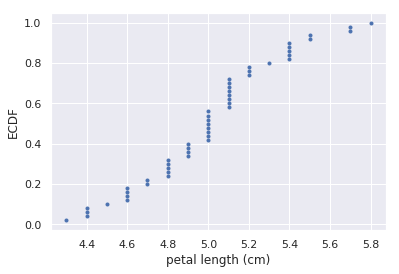

In [19]:
# Compute ECDF for versicolor data: x_vers, y_vers
x_vers, y_vers = ecdf(versicolor_petal_length)

# Generate plot
_ = plt.plot(x_vers,y_vers, marker=".", linestyle="none")

# Label the axes
_ = plt.xlabel("petal length (cm)")
_ = plt.ylabel("ECDF")

# Display the plot
plt.margins(0.05)
plt.show()


<font color=green>
# Exercise 3. Comparison of ECDFs
</font>
ECDFs also allow you to compare two or more distributions (though plots get cluttered if you have too many). Here, you will plot ECDFs for the petal lengths of all three iris species. You already wrote a function to generate ECDFs so you can put it to good use!

To overlay all three ECDFs on the same plot, you can use plt.plot() three times, once for each ECDF. Remember to include marker='.' and linestyle='none' as arguments inside plt.plot().

#### Instructions
> - Compute ECDFs for each of the three species using your ecdf() function. The variables setosa_petal_length, versicolor_petal_length, and virginica_petal_length are all in your namespace. Unpack the ECDFs into x_set, y_set, x_vers, y_vers and x_virg, y_virg, respectively.
> - Plot all three ECDFs on the same plot as dots. To do this, you will need three plt.plot() commands. Assign the result of each to _.
> - A legend and axis labels have been added for you, so hit 'Submit Answer' to see all the ECDFs!
    

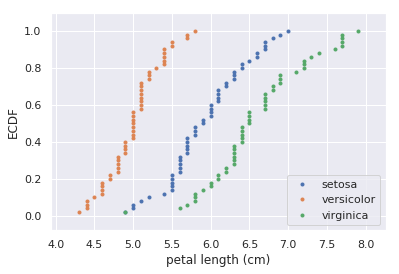

In [20]:
# Compute ECDFs
x_set, y_set = ecdf(setosa_petal_length)
x_vers, y_vers = ecdf(versicolor_petal_length)
x_virg, y_virg = ecdf(virginica_petal_length)

# Plot all ECDFs on the same plot
_ = plt.plot(x_set, y_set, marker=".", linestyle="none")
_ = plt.plot(x_vers, y_vers, marker=".", linestyle="none")
_ = plt.plot(x_virg, y_virg, marker=".", linestyle="none")

# Annotate the plot
plt.legend(('setosa', 'versicolor', 'virginica'), loc='lower right')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

# Display the plot
plt.margins(0.1)
plt.show()



<div class="alert alert-block alert-success">
<b>Onward toward the whole story!</b>
</div>



You now have some great graphical EDA tools. 

You can quickly generate and investigate a **histogram**. You can immediately get a feel for your data by plotting all of them, with **bee swarm plots** or **ECDFs**. 

In almost every data set you should start with graphical EDA (with these plots or any other kind of plot you think can offer you a graphical comprehension of your data, such as line plots, scatter plot, density plots ... )

<img src="img/summaryGEDA.png",width=470>

Remember what Tukey said <font color=grey>Exploratory data analysis can never be the whole story, but nothing else can serve as the foundation stone</font>.

<div class="alert alert-block alert-warning">
<b>Coming up:</b> In the next section, you will build upon graphical EDA with quantitative EDA, which allows you to compute useful summary statistics. 

With your foundation stone in place, you will spend the last half of this session learning to think probabilistically. I will not get mired in mathematical details, but rather will unleash the power of NumPy module to do statistics. You will find that by writting a few lines of Python code, you can perform even putatively complicated statistics analyses.
</div>